In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train, X_test = X_train / 255.0, X_test / 255.0



11501568/11490434 [==============================] - 1s 0us/step


In [2]:
model = tf.keras.models.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [3]:
model.fit(X_train, y_train, epochs=5)

model.evaluate(X_test, y_test, verbose=2)

Epoch 1/5
   1/1875 [..............................] - ETA: 3:53 - loss: 2.4327 - acc: 0.0312

2022-07-17 23:29:44.980853: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 1s 662us/step - loss: 0.2966 - acc: 0.9128
Epoch 2/5
1875/1875 [==============================] - 1s 674us/step - loss: 0.1413 - acc: 0.9583
Epoch 3/5
1875/1875 [==============================] - 1s 627us/step - loss: 0.1059 - acc: 0.9674
Epoch 4/5
1875/1875 [==============================] - 1s 680us/step - loss: 0.0895 - acc: 0.9727
Epoch 5/5
1875/1875 [==============================] - 1s 657us/step - loss: 0.0754 - acc: 0.9765
313/313 - 0s - loss: 0.0864 - acc: 0.9748 - 156ms/epoch - 499us/step


[0.08640680462121964, 0.9747999906539917]

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_img, train_labels), (test_img, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

2.7.0


In [5]:
train_img.shape
print(train_img.shape)

len(train_labels)

test_img.shape

(60000, 28, 28)


(10000, 28, 28)

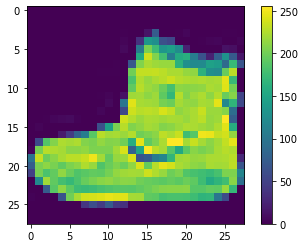

In [8]:
plt.figure()
plt.imshow(train_img[0])
plt.colorbar()
plt.grid(False)
plt.show()

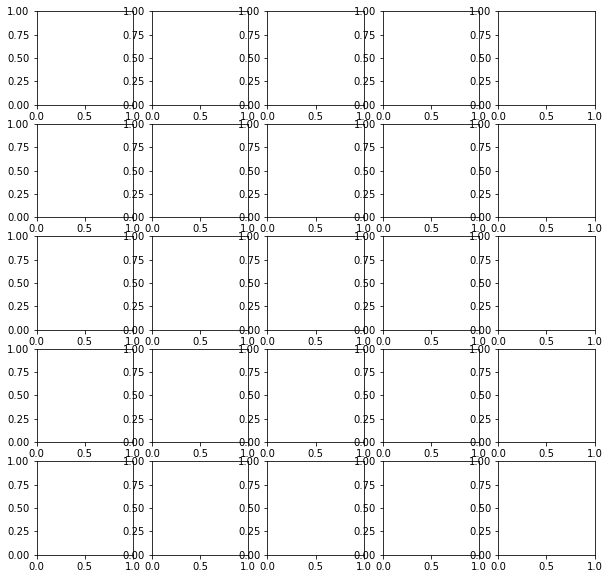

In [18]:
train_img = train_img / 255.0
test_img = test_img / 255.0
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5 ,i+1)



